In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, recall_score, f1_score, precision_recall_fscore_support, classification_report, confusion_matrix, accuracy_score, mean_squared_error

In [2]:
df = pd.read_csv('../data/processed_attrition_data.csv')

X = df.drop(columns=['Attrition_Risk_Level'])
y = df['Attrition_Risk_Level']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data Siap! Silakan lanjut ke blok eksperimen.")

✅ Data Siap! Silakan lanjut ke blok eksperimen.


In [4]:
list_lr = [0.04, 0.08, 0.06, 0.05, 0.009, 0.2, 0.6, 0.012, 0.01, 0.015, 0.018, 0.0111]

# 🧪 Eksperimen No. 1
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.04` (Index List: [0])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.04
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.84683447
Validation score: 0.884000
Iteration 2, loss = 0.14601419
Validation score: 0.988000
Iteration 3, loss = 0.08198229
Validation score: 0.978667
Iteration 4, loss = 0.06542976
Validation score: 0.978667
Iteration 5, loss = 0.05033891
Validation score: 0.985333
Iteration 6, loss = 0.04928780
Validation score: 0.981333
Iteration 7, loss = 0.04353907
Validation score: 0.978667
Iteration 8, loss = 0.04387029
Validation score: 0.985333
Iteration 9, loss = 0.03271867
Validation score: 0.994667
Iteration 10, loss = 0.03588244
Validation score: 0.980000
Iteration 11, loss = 0.05223992
Validation score: 0.985333
Iteration 12, loss = 0.03430814
Validation score: 0.990667
Iteration 13, loss = 0.03863712
Validation score: 0.990667
Iteration 14, loss = 0.03379849
Validation score: 0.990667
Iteration

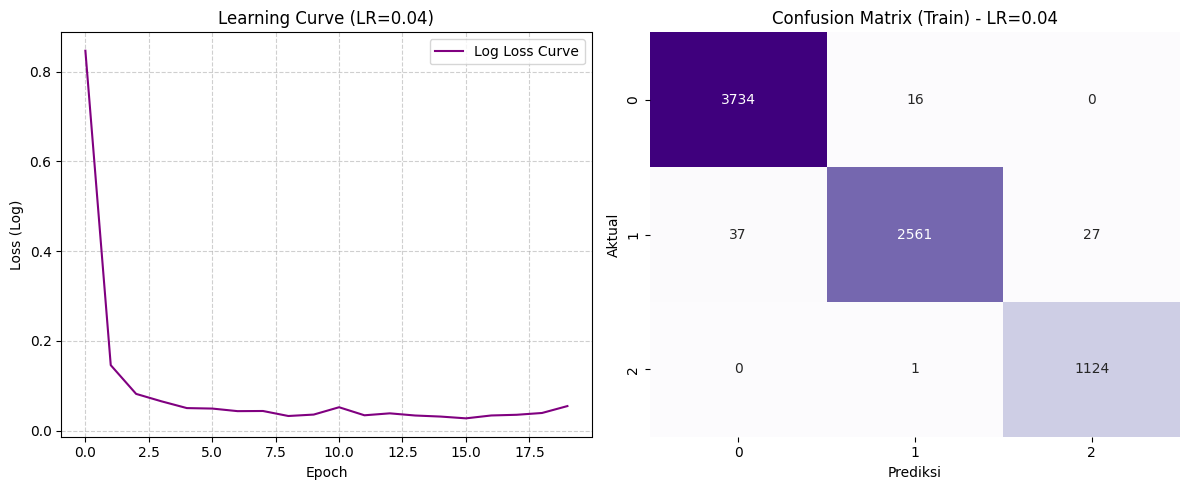


📊 HASIL AKHIR (LR=0.04):
1. Epoch Terakhir  : 20
2. Train Loss (MSE): 0.01080
3. Train Acc       : 0.9892
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3750
           1       0.99      0.98      0.98      2625
           2       0.98      1.00      0.99      1125

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [5]:
LR = list_lr[0]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 2
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.08` (Index List: [1])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.08
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.89873341
Validation score: 0.736000
Iteration 2, loss = 0.29121223
Validation score: 0.956000
Iteration 3, loss = 0.09216057
Validation score: 0.977333
Iteration 4, loss = 0.07356567
Validation score: 0.970667
Iteration 5, loss = 0.05173657
Validation score: 0.990667
Iteration 6, loss = 0.05483184
Validation score: 0.980000
Iteration 7, loss = 0.04550140
Validation score: 0.988000
Iteration 8, loss = 0.03903759
Validation score: 0.985333
Iteration 9, loss = 0.04247740
Validation score: 0.985333
Iteration 10, loss = 0.03701293
Validation score: 0.978667
Iteration 11, loss = 0.04759625
Validation score: 0.990667
Iteration 12, loss = 0.04633409
Validation score: 0.976000
Iteration 13, loss = 0.03742773
Validation score: 0.990667
Iteration 14, loss = 0.03973702
Validation score: 0.993333
Iteration

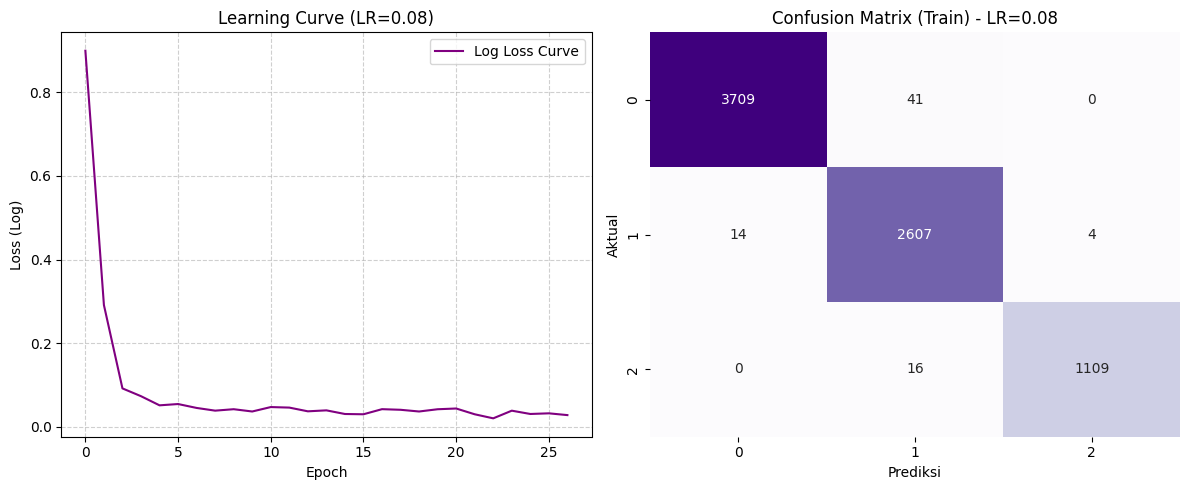


📊 HASIL AKHIR (LR=0.08):
1. Epoch Terakhir  : 27
2. Train Loss (MSE): 0.01000
3. Train Acc       : 0.9900
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3750
           1       0.98      0.99      0.99      2625
           2       1.00      0.99      0.99      1125

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [6]:
LR = list_lr[1]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 3
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.06` (Index List: [2])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.06
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.86236590
Validation score: 0.752000
Iteration 2, loss = 0.23095878
Validation score: 0.985333
Iteration 3, loss = 0.09108918
Validation score: 0.972000
Iteration 4, loss = 0.07251802
Validation score: 0.974667
Iteration 5, loss = 0.06295554
Validation score: 0.986667
Iteration 6, loss = 0.04759409
Validation score: 0.980000
Iteration 7, loss = 0.04455386
Validation score: 0.981333
Iteration 8, loss = 0.03644299
Validation score: 0.992000
Iteration 9, loss = 0.04283388
Validation score: 0.986667
Iteration 10, loss = 0.04001669
Validation score: 0.980000
Iteration 11, loss = 0.05510738
Validation score: 0.985333
Iteration 12, loss = 0.04011200
Validation score: 0.982667
Iteration 13, loss = 0.04465937
Validation score: 0.994667
Iteration 14, loss = 0.03004461
Validation score: 0.993333
Iteration

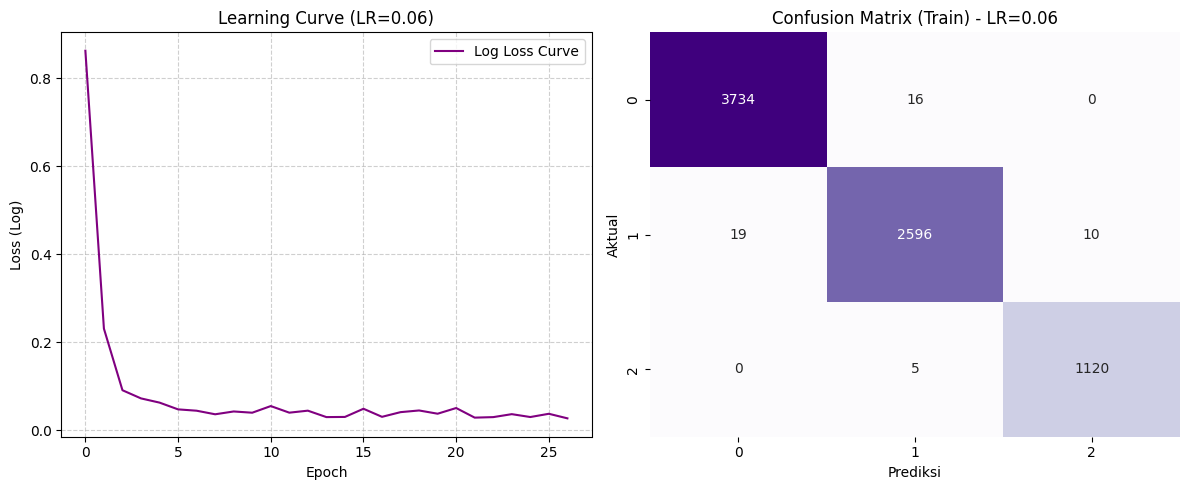


📊 HASIL AKHIR (LR=0.06):
1. Epoch Terakhir  : 27
2. Train Loss (MSE): 0.00667
3. Train Acc       : 0.9933
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3750
           1       0.99      0.99      0.99      2625
           2       0.99      1.00      0.99      1125

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [7]:
LR = list_lr[2]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 4
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.005` (Index List: [3])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.05
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.85795670
Validation score: 0.764000
Iteration 2, loss = 0.18578822
Validation score: 0.988000
Iteration 3, loss = 0.07002465
Validation score: 0.969333
Iteration 4, loss = 0.06027940
Validation score: 0.978667
Iteration 5, loss = 0.04910149
Validation score: 0.986667
Iteration 6, loss = 0.05085936
Validation score: 0.986667
Iteration 7, loss = 0.04297263
Validation score: 0.978667
Iteration 8, loss = 0.03976088
Validation score: 0.990667
Iteration 9, loss = 0.03923792
Validation score: 0.980000
Iteration 10, loss = 0.03722493
Validation score: 0.986667
Iteration 11, loss = 0.04776478
Validation score: 0.988000
Iteration 12, loss = 0.03846056
Validation score: 0.984000
Iteration 13, loss = 0.03813405
Validation score: 0.989333
Iteration 14, loss = 0.03000381
Validation score: 0.993333
Iteration

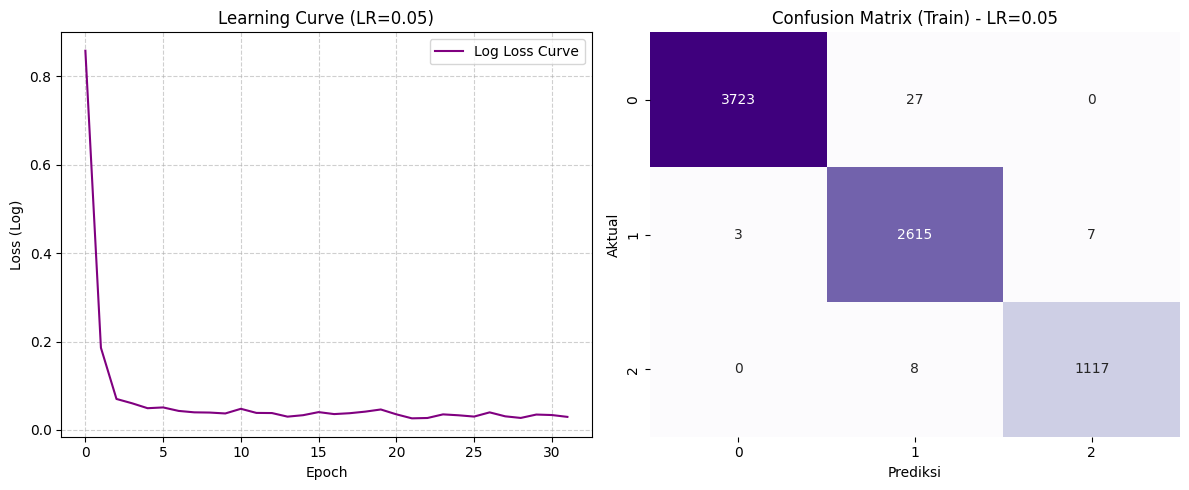


📊 HASIL AKHIR (LR=0.05):
1. Epoch Terakhir  : 32
2. Train Loss (MSE): 0.00600
3. Train Acc       : 0.9940
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3750
           1       0.99      1.00      0.99      2625
           2       0.99      0.99      0.99      1125

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [8]:
LR = list_lr[3]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 5
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.009` (Index List: [4])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.009
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.99984161
Validation score: 0.536000
Iteration 2, loss = 0.68777651
Validation score: 0.874667
Iteration 3, loss = 0.23030214
Validation score: 0.985333
Iteration 4, loss = 0.09268965
Validation score: 0.984000
Iteration 5, loss = 0.05847601
Validation score: 0.990667
Iteration 6, loss = 0.05034426
Validation score: 0.986667
Iteration 7, loss = 0.04276160
Validation score: 0.993333
Iteration 8, loss = 0.03895113
Validation score: 0.989333
Iteration 9, loss = 0.03231229
Validation score: 0.997333
Iteration 10, loss = 0.03347625
Validation score: 0.980000
Iteration 11, loss = 0.04222685
Validation score: 0.993333
Iteration 12, loss = 0.03515960
Validation score: 0.990667
Iteration 13, loss = 0.02606121
Validation score: 0.996000
Iteration 14, loss = 0.02582210
Validation score: 0.996000
Iteratio

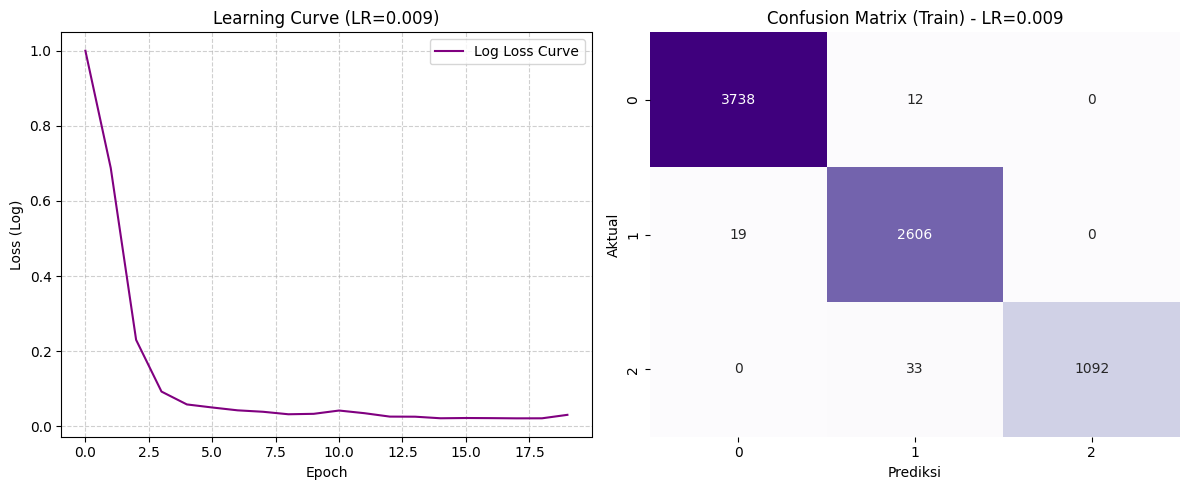


📊 HASIL AKHIR (LR=0.009):
1. Epoch Terakhir  : 20
2. Train Loss (MSE): 0.00853
3. Train Acc       : 0.9915
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3750
           1       0.98      0.99      0.99      2625
           2       1.00      0.97      0.99      1125

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [9]:
LR = list_lr[4]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 6
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.2` (Index List: [5])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.2
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 1.12137127
Validation score: 0.536000
Iteration 2, loss = 1.02187010
Validation score: 0.536000
Iteration 3, loss = 1.00683636
Validation score: 0.536000
Iteration 4, loss = 1.01637319
Validation score: 0.536000
Iteration 5, loss = 1.01308912
Validation score: 0.536000
Iteration 6, loss = 1.02170306
Validation score: 0.536000
Iteration 7, loss = 1.01165384
Validation score: 0.536000
Iteration 8, loss = 1.01259347
Validation score: 0.536000
Iteration 9, loss = 1.01087142
Validation score: 0.536000
Iteration 10, loss = 1.01558494
Validation score: 0.536000
Iteration 11, loss = 1.02731091
Validation score: 0.536000
Iteration 12, loss = 1.01011206
Validation score: 0.536000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


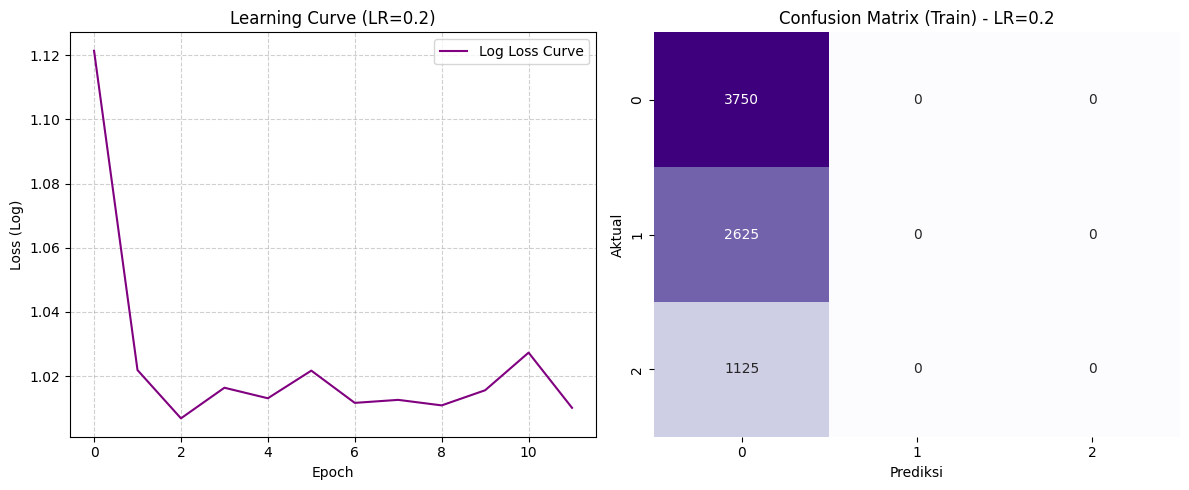


📊 HASIL AKHIR (LR=0.2):
1. Epoch Terakhir  : 12
2. Train Loss (MSE): 0.95000
3. Train Acc       : 0.5000
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3750
           1       0.00      0.00      0.00      2625
           2       0.00      0.00      0.00      1125

    accuracy                           0.50      7500
   macro avg       0.17      0.33      0.22      7500
weighted avg       0.25      0.50      0.33      7500



In [10]:
LR = list_lr[5]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 7
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.6` (Index List: [6])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.6
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 1.56416360
Validation score: 0.536000
Iteration 2, loss = 1.03808564
Validation score: 0.536000
Iteration 3, loss = 1.03437019
Validation score: 0.536000
Iteration 4, loss = 1.03947895
Validation score: 0.536000
Iteration 5, loss = 1.04267794
Validation score: 0.536000
Iteration 6, loss = 1.04236007
Validation score: 0.313333
Iteration 7, loss = 1.07405858
Validation score: 0.536000
Iteration 8, loss = 1.22360104
Validation score: 0.313333
Iteration 9, loss = 1.06039345
Validation score: 0.536000
Iteration 10, loss = 1.05156579
Validation score: 0.536000
Iteration 11, loss = 1.04126802
Validation score: 0.536000
Iteration 12, loss = 1.03604610
Validation score: 0.536000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


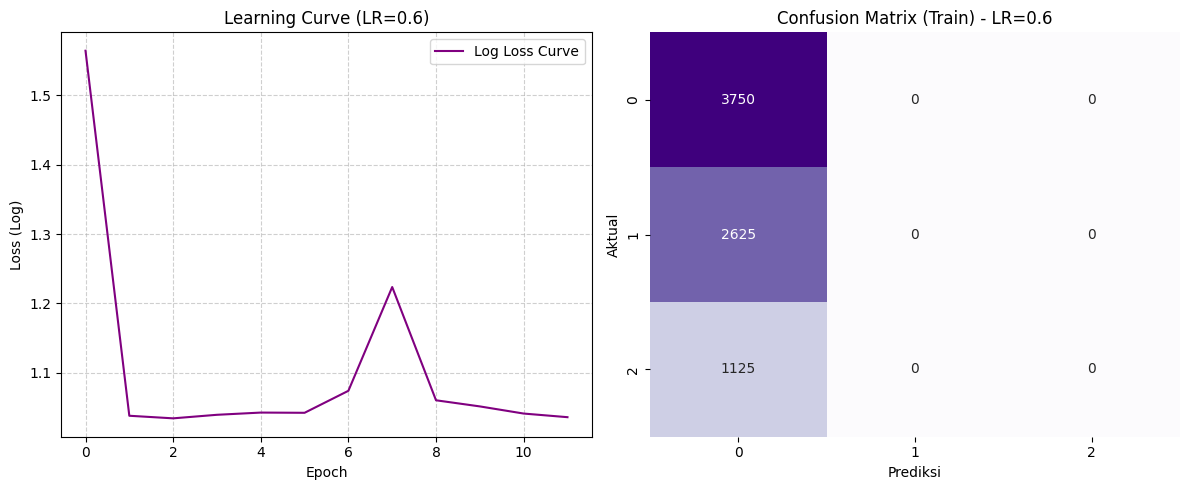


📊 HASIL AKHIR (LR=0.6):
1. Epoch Terakhir  : 12
2. Train Loss (MSE): 0.95000
3. Train Acc       : 0.5000
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3750
           1       0.00      0.00      0.00      2625
           2       0.00      0.00      0.00      1125

    accuracy                           0.50      7500
   macro avg       0.17      0.33      0.22      7500
weighted avg       0.25      0.50      0.33      7500



In [11]:
LR = list_lr[6]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 8
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.0.12` (Index List: [7])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.012
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.98922497
Validation score: 0.556000
Iteration 2, loss = 0.54209580
Validation score: 0.962667
Iteration 3, loss = 0.13365712
Validation score: 0.969333
Iteration 4, loss = 0.07068512
Validation score: 0.984000
Iteration 5, loss = 0.04712451
Validation score: 0.992000
Iteration 6, loss = 0.04544999
Validation score: 0.986667
Iteration 7, loss = 0.04338456
Validation score: 0.990667
Iteration 8, loss = 0.04050415
Validation score: 0.988000
Iteration 9, loss = 0.03092338
Validation score: 0.997333
Iteration 10, loss = 0.03342183
Validation score: 0.978667
Iteration 11, loss = 0.04843169
Validation score: 0.996000
Iteration 12, loss = 0.03805587
Validation score: 0.989333
Iteration 13, loss = 0.02803051
Validation score: 0.998667
Iteration 14, loss = 0.02639956
Validation score: 0.994667
Iteratio

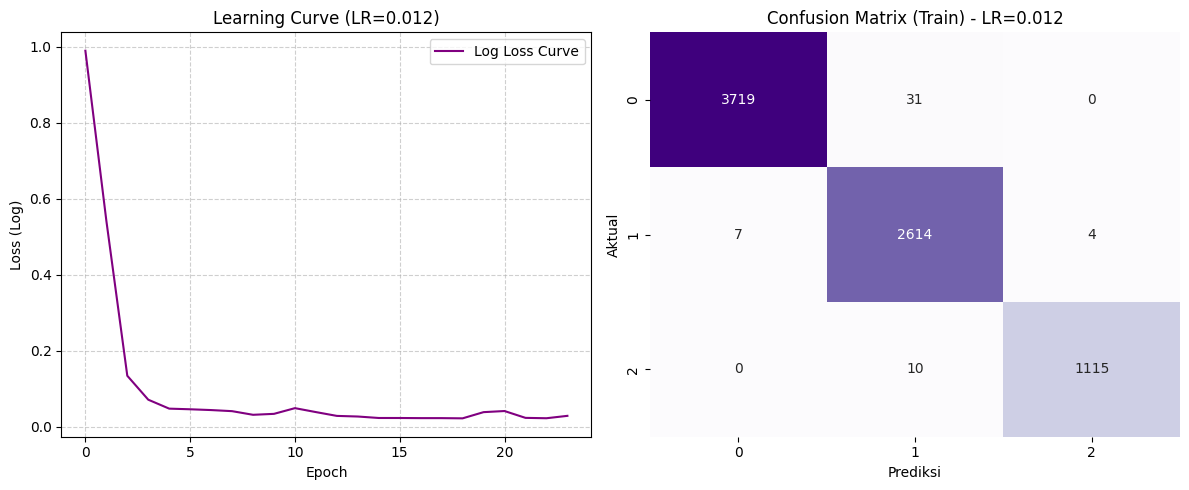


📊 HASIL AKHIR (LR=0.012):
1. Epoch Terakhir  : 24
2. Train Loss (MSE): 0.00693
3. Train Acc       : 0.9931
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3750
           1       0.98      1.00      0.99      2625
           2       1.00      0.99      0.99      1125

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [12]:
LR = list_lr[7]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 9
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.01` (Index List: [8])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.01
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.99664921
Validation score: 0.536000
Iteration 2, loss = 0.63428061
Validation score: 0.924000
Iteration 3, loss = 0.18637875
Validation score: 0.972000
Iteration 4, loss = 0.08259477
Validation score: 0.980000
Iteration 5, loss = 0.05129906
Validation score: 0.990667
Iteration 6, loss = 0.04854423
Validation score: 0.988000
Iteration 7, loss = 0.04302792
Validation score: 0.993333
Iteration 8, loss = 0.03921498
Validation score: 0.989333
Iteration 9, loss = 0.03141909
Validation score: 0.997333
Iteration 10, loss = 0.03296292
Validation score: 0.980000
Iteration 11, loss = 0.04377300
Validation score: 0.994667
Iteration 12, loss = 0.03645456
Validation score: 0.989333
Iteration 13, loss = 0.02674094
Validation score: 0.997333
Iteration 14, loss = 0.02587827
Validation score: 0.996000
Iteration

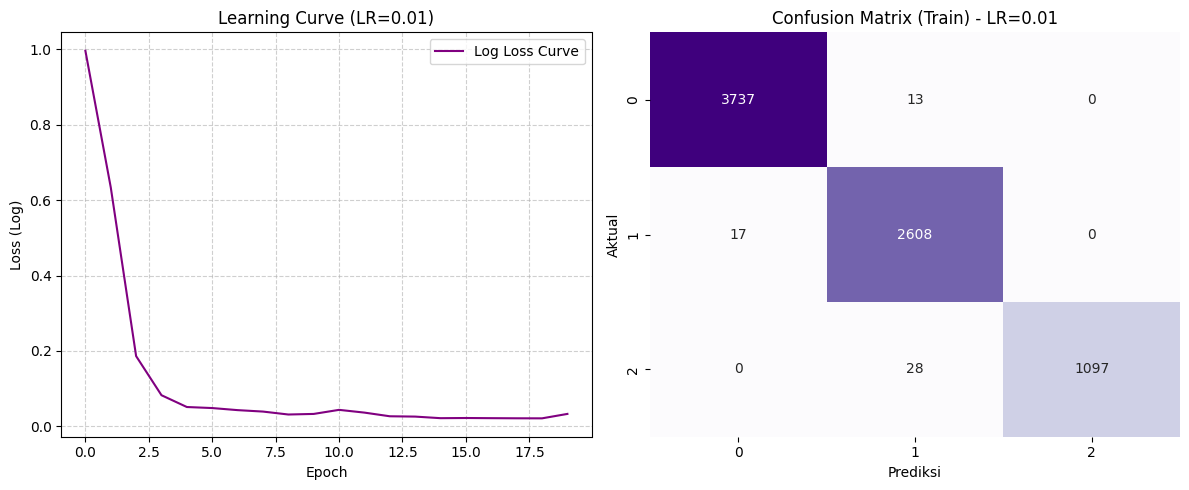


📊 HASIL AKHIR (LR=0.01):
1. Epoch Terakhir  : 20
2. Train Loss (MSE): 0.00773
3. Train Acc       : 0.9923
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3750
           1       0.98      0.99      0.99      2625
           2       1.00      0.98      0.99      1125

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [13]:
LR = list_lr[8]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 10
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.015` (Index List: [9])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.015
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.97596570
Validation score: 0.616000
Iteration 2, loss = 0.45190955
Validation score: 0.976000
Iteration 3, loss = 0.10253072
Validation score: 0.980000
Iteration 4, loss = 0.06390682
Validation score: 0.982667
Iteration 5, loss = 0.04348677
Validation score: 0.990667
Iteration 6, loss = 0.04783278
Validation score: 0.984000
Iteration 7, loss = 0.04426249
Validation score: 0.992000
Iteration 8, loss = 0.04069452
Validation score: 0.986667
Iteration 9, loss = 0.03099118
Validation score: 0.997333
Iteration 10, loss = 0.03464844
Validation score: 0.977333
Iteration 11, loss = 0.05654929
Validation score: 0.990667
Iteration 12, loss = 0.03878503
Validation score: 0.989333
Iteration 13, loss = 0.02974304
Validation score: 0.998667
Iteration 14, loss = 0.02703626
Validation score: 0.994667
Iteratio

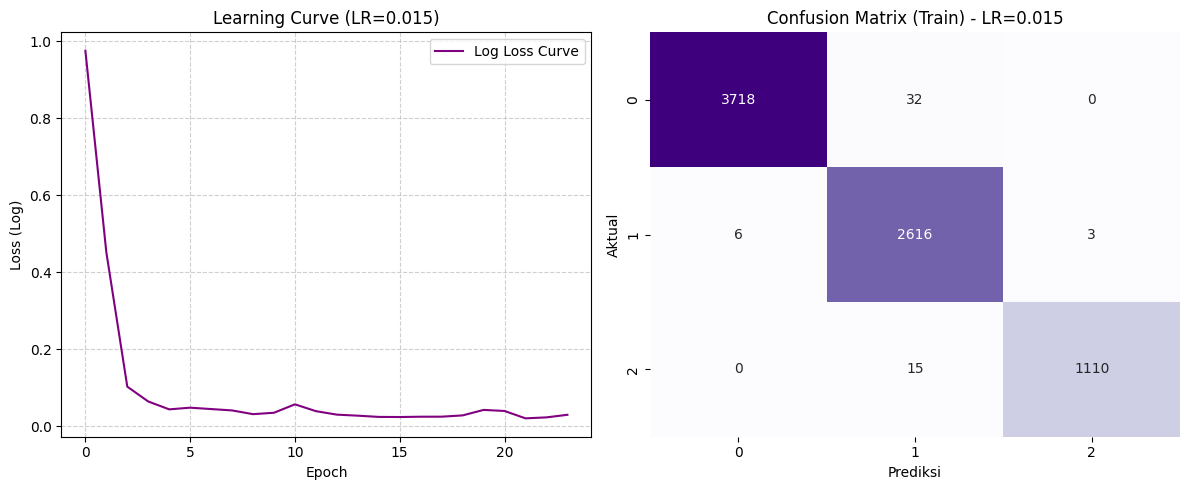


📊 HASIL AKHIR (LR=0.015):
1. Epoch Terakhir  : 24
2. Train Loss (MSE): 0.00747
3. Train Acc       : 0.9925
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3750
           1       0.98      1.00      0.99      2625
           2       1.00      0.99      0.99      1125

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [14]:
LR = list_lr[9]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 11
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.018` (Index List: [9])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.018
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.96057657
Validation score: 0.676000
Iteration 2, loss = 0.38612826
Validation score: 0.966667
Iteration 3, loss = 0.09296106
Validation score: 0.980000
Iteration 4, loss = 0.05849326
Validation score: 0.982667
Iteration 5, loss = 0.04771023
Validation score: 0.992000
Iteration 6, loss = 0.04154174
Validation score: 0.981333
Iteration 7, loss = 0.04482605
Validation score: 0.977333
Iteration 8, loss = 0.04295537
Validation score: 0.988000
Iteration 9, loss = 0.03143413
Validation score: 0.996000
Iteration 10, loss = 0.03959287
Validation score: 0.970667
Iteration 11, loss = 0.06039129
Validation score: 0.981333
Iteration 12, loss = 0.03895499
Validation score: 0.988000
Iteration 13, loss = 0.03300584
Validation score: 0.993333
Iteration 14, loss = 0.02752755
Validation score: 0.994667
Iteratio

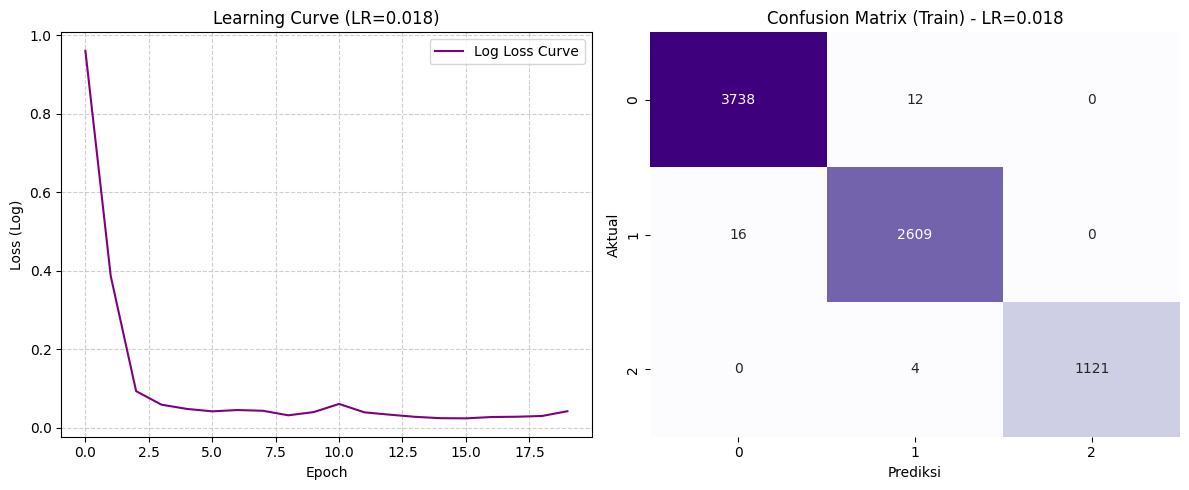


📊 HASIL AKHIR (LR=0.018):
1. Epoch Terakhir  : 20
2. Train Loss (MSE): 0.00427
3. Train Acc       : 0.9957
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3750
           1       0.99      0.99      0.99      2625
           2       1.00      1.00      1.00      1125

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [15]:
LR = list_lr[10]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 12
### **Konfigurasi 1 (Split 50% Train : 50% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.0111` (Index List: [11])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.0111
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.99272723
Validation score: 0.544000
Iteration 2, loss = 0.58122921
Validation score: 0.946667
Iteration 3, loss = 0.15321612
Validation score: 0.968000
Iteration 4, loss = 0.07545944
Validation score: 0.984000
Iteration 5, loss = 0.04806134
Validation score: 0.990667
Iteration 6, loss = 0.04708838
Validation score: 0.986667
Iteration 7, loss = 0.04321895
Validation score: 0.993333
Iteration 8, loss = 0.04014999
Validation score: 0.988000
Iteration 9, loss = 0.03121395
Validation score: 0.997333
Iteration 10, loss = 0.03305494
Validation score: 0.980000
Iteration 11, loss = 0.04602140
Validation score: 0.996000
Iteration 12, loss = 0.03758735
Validation score: 0.989333
Iteration 13, loss = 0.02754750
Validation score: 0.998667
Iteration 14, loss = 0.02599743
Validation score: 0.994667
Iterati

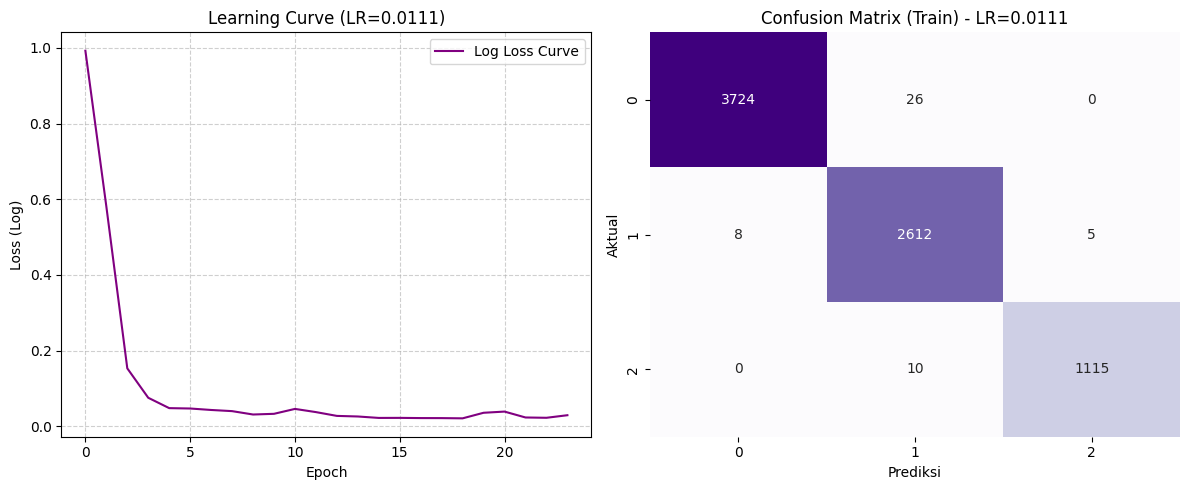


📊 HASIL AKHIR (LR=0.0111):
1. Epoch Terakhir  : 24
2. Train Loss (MSE): 0.00653
3. Train Acc       : 0.9935
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3750
           1       0.99      1.00      0.99      2625
           2       1.00      0.99      0.99      1125

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [16]:
LR = list_lr[11]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))